In [34]:
import torch 
import random
import numpy as np
import torchvision.datasets
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Import and transofrm data

In [ ]:
Mnist_train = torchvision.datasets.MNIST("./", download=False, train=True)
Mnist_test = torchvision.datasets.MNIST("./", download=False, train=False)

In [17]:
X_train = Mnist_train.data
y_train = Mnist_train.targets
X_test = Mnist_test.data
y_test = Mnist_test.targets

len(X_test), len(y_test), len(X_train), len(y_train)

In [37]:
def get_padding2d(input):
    padded_images = torch.nn.ConstantPad2d(2, 0)
    output = padded_images(input)
    return output
#transform data
X_test = get_padding2d(X_train.reshape(60000,1,28,28)).float()
y_test = y_train.long()

X_train = get_padding2d(X_train.reshape(60000,1,28,28)).float()
y_train = y_train.long()

### Our Model

In [9]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

        
model = LeNet()     

### Define loss and optimizer

In [28]:
loss_fucntion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Train model

In [32]:
batch_size = 100
iterations = 15
accuracies = []
losses = []

for i in range(iterations):
    #random sample
    sample = np.random.randint(0, X_train.shape[0], size = batch_size)
    inputs = X_train[sample]
    labels = y[sample]
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = loss_fucntion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # accuracy
    predicted = torch.argmax(outputs, dim=1)
    accuracy = ((predicted==labels).float().mean().item())*100
    # loss
    loss = loss.item()
    
    #statistics
    accuracies.append(accuracy)
    losses.append(loss)
    print ("Accuracy:", accuracy,'Loss:',loss)

Accuracy: 76.99999809265137 Loss: 0.7304259538650513
Accuracy: 76.99999809265137 Loss: 0.7059318423271179
Accuracy: 81.00000023841858 Loss: 0.6097317337989807
Accuracy: 81.00000023841858 Loss: 0.5199443101882935
Accuracy: 87.99999952316284 Loss: 0.47604086995124817
Accuracy: 80.0000011920929 Loss: 0.5366595983505249
Accuracy: 79.00000214576721 Loss: 0.6765927672386169
Accuracy: 81.99999928474426 Loss: 0.6046347618103027
Accuracy: 76.99999809265137 Loss: 0.6535075902938843
Accuracy: 80.0000011920929 Loss: 0.6317746639251709
Accuracy: 82.99999833106995 Loss: 0.649269700050354
Accuracy: 82.99999833106995 Loss: 0.546328067779541
Accuracy: 83.99999737739563 Loss: 0.5253624320030212
Accuracy: 76.99999809265137 Loss: 0.7029475569725037
Accuracy: 89.99999761581421 Loss: 0.3562715947628021


### Visualization

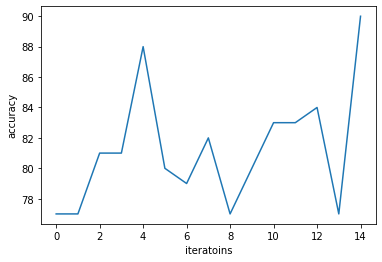

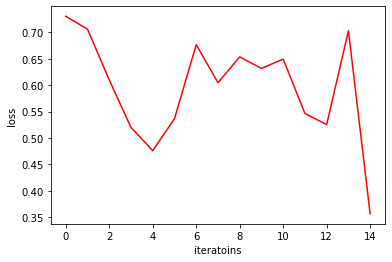

In [35]:
plt.plot(accuracies)
plt.xlabel('iteratoins')
plt.ylabel('accuracy')
plt.show()

plt.plot(losses, color="red")
plt.xlabel('iteratoins')
plt.ylabel('loss')
plt.show()

### Validation

In [38]:
outputs = model(X_test)
predicted = torch.argmax(outputs, dim=1)
accuracy = ((predicted==y_test).float().mean().item())*100
print ("Accuracy:", accuracy,'Loss:',loss)

Accuracy: 84.0166687965393 Loss: 0.3562715947628021
